In [11]:
# Importing necessary libraries

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, r2_score

In [12]:
# Loading the Iris dataset

iris = pd.read_csv(r"C:\Users\admin\Downloads\Iris.csv")

In [13]:
# Displaying the first 10 rows of the dataset

iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
# Checking the shape (number of rows and columns) of the dataset

iris.shape

(150, 6)

In [15]:
# Displaying summary statistics of the dataset

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [16]:
# Getting information about the dataset, including data types and non-null counts

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
# Checking for missing values in the dataset

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
# Dropping Unneccesary Column in the Dataset

iris = iris.drop('Id',axis=1)

In [19]:
# Calculating the mean values of each feature for different Species

iris.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


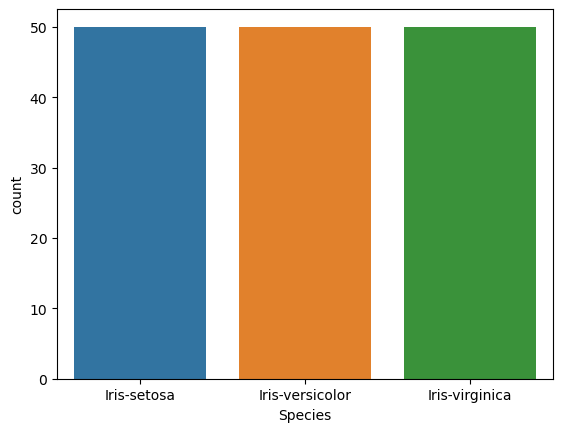

In [20]:
 
sb.countplot(x='Species', data=iris, )
plt.show()

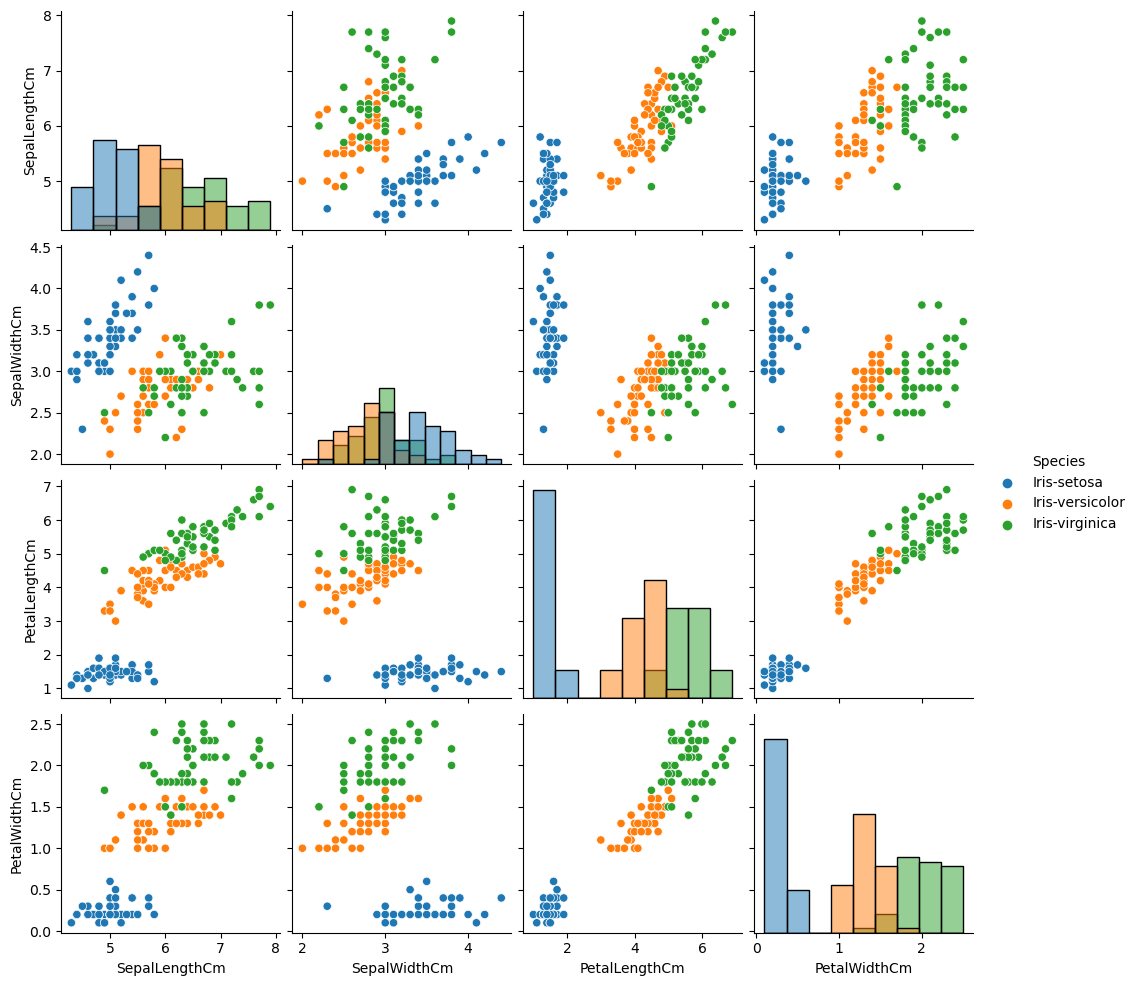

In [21]:
# Creating a pairplot to visualize relationships between different features based on Species

sb.pairplot(iris,hue="Species",diag_kind="hist")

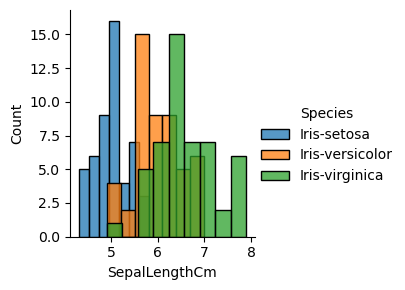

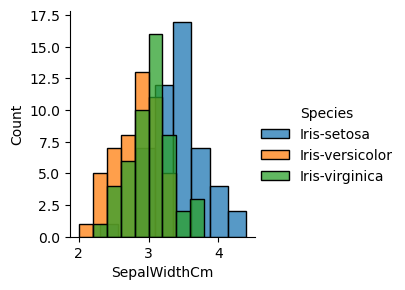

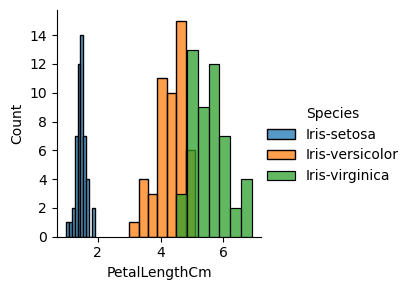

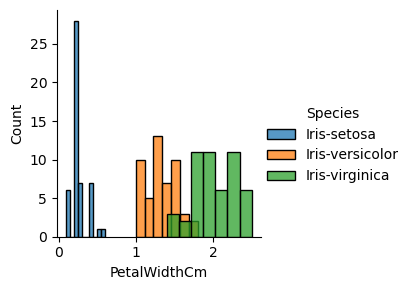

In [26]:
plot = sb.FacetGrid(iris, hue="Species")
plot.map(sb.histplot, "SepalLengthCm").add_legend()
 
plot = sb.FacetGrid(iris, hue="Species")
plot.map(sb.histplot, "SepalWidthCm").add_legend()
 
plot = sb.FacetGrid(iris, hue="Species")
plot.map(sb.histplot, "PetalLengthCm").add_legend()
 
plot = sb.FacetGrid(iris, hue="Species")
plot.map(sb.histplot, "PetalWidthCm").add_legend()
 
plt.show()

In [12]:
# Converting categorical varibales into numbers

iris["Species"] = iris["Species"].map({'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica':2})

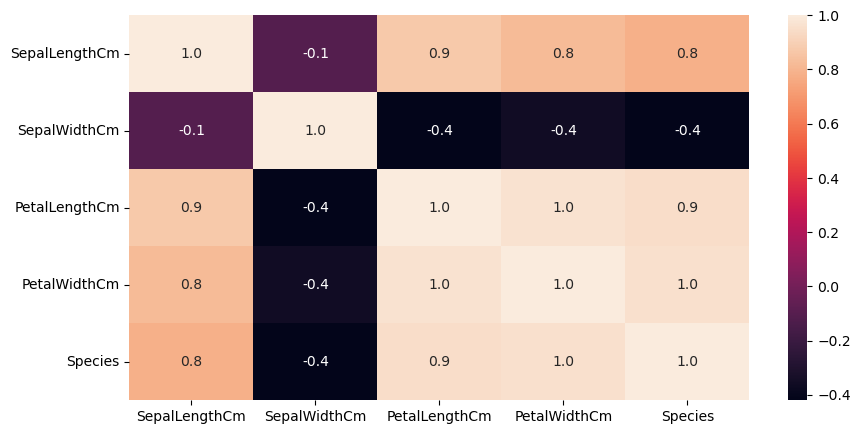

In [13]:
# Creating a heatmap to visualize the correlation between features

plt.figure(figsize=(10,5))
sb.heatmap(iris.corr(),annot=True,fmt='0.1f')
plt.show()

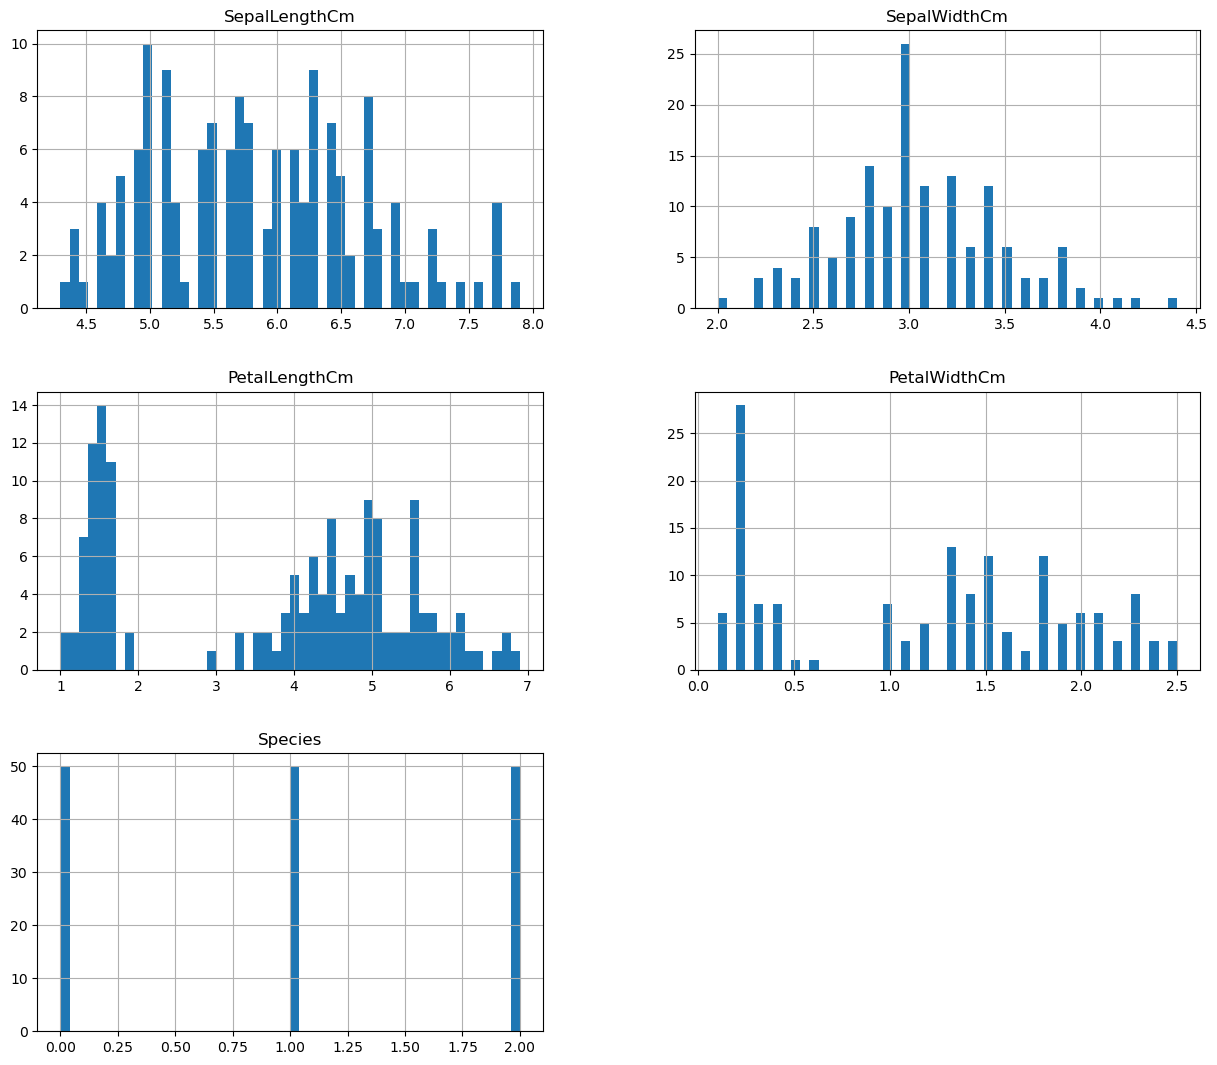

In [14]:
# Creating histograms for each feature to visualize their distributions

iris.hist(figsize=(15,13),bins=50)
plt.show()

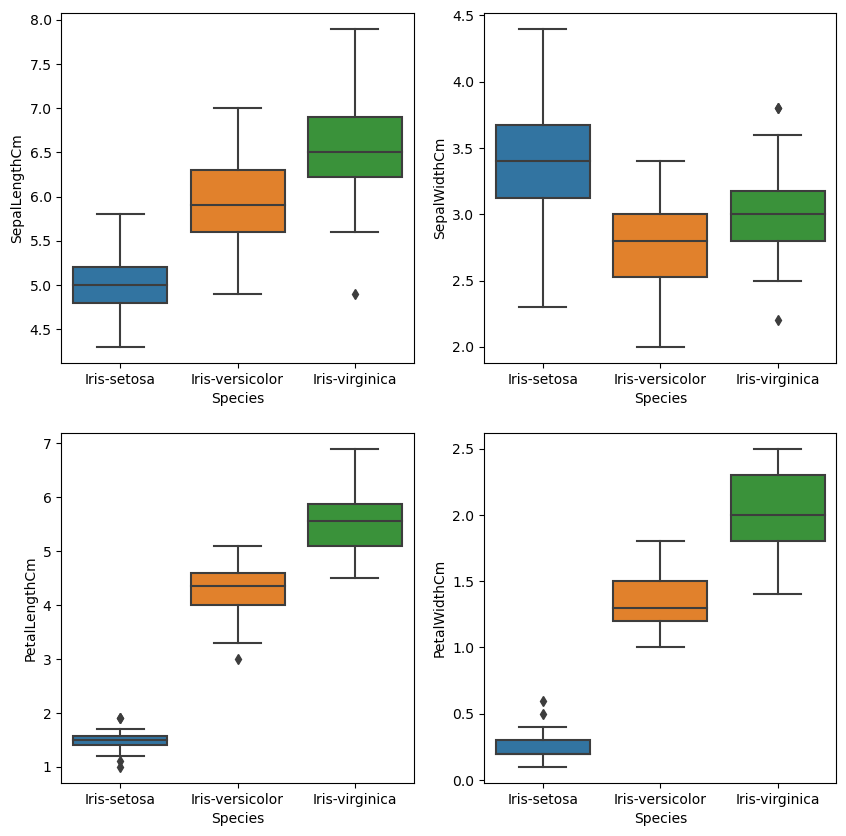

In [9]:
def graph(y):
    sb.boxplot(x="Species", y=y, data=iris)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
 
plt.subplot(222)
graph('SepalWidthCm')
 
plt.subplot(223)
graph('PetalLengthCm')
 
plt.subplot(224)
graph('PetalWidthCm')
 
plt.show()

In [15]:
# Defining the Features/Independent Variables (X) and Target variable/Dependent Variable (y) 

x = iris.drop('Species',axis=1)
y = iris['Species']

In [16]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

<Axes: xlabel='SepalWidthCm'>

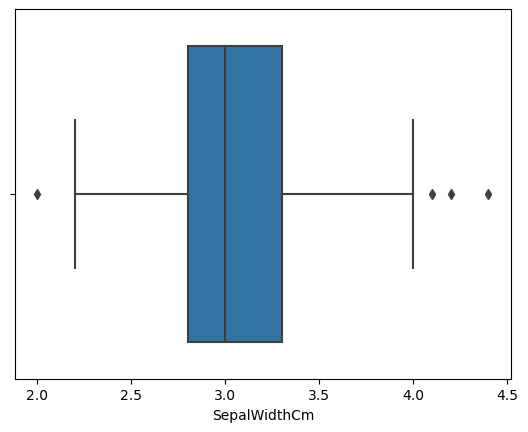

In [10]:
sb.boxplot(x='SepalWidthCm', data=iris)

In [18]:
# Splitting the dataset into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=5)

In [19]:
# Instantiating a Logistic Regression model

model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = model_logistic.predict(X_test)

In [20]:
# Calculate binary classification metrics for the Logistic Regression model

accuracy = accuracy_score(y_test, y_pred_logistic)
r2_logistic = r2_score(y_test, y_pred_logistic)
print(f'Accuracy: {accuracy*100}')
print(f'R-squared (R^2): {r2_logistic*100}')

Accuracy: 98.33333333333333
R-squared (R^2): 97.43480119709278


In [21]:
# Classification Metrics of Logistic Regression

print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.97        19

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [22]:
# Confusion Matrix of Logistic Regression

print(confusion_matrix(y_test, y_pred_logistic))

[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]


In [23]:
# Creating new data for prediction

new_data = pd.DataFrame({
    'SepalLengthCm':4.6,
    'SepalWidthCm':3.2,
    'PetalLengthCm':1.5,
    'PetalWidthCm':0.2,
     
},index=[0])

prediction = model_logistic.predict(new_data)

if prediction[0]== 0:
    print("setosa")
elif prediction[0] == 1:
    print("versicolor")
else:
    print("virginica")

setosa
